In [57]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST 데이터

In [58]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [59]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [60]:
X = X.to_numpy()

In [61]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Saving figure some_digit_plot


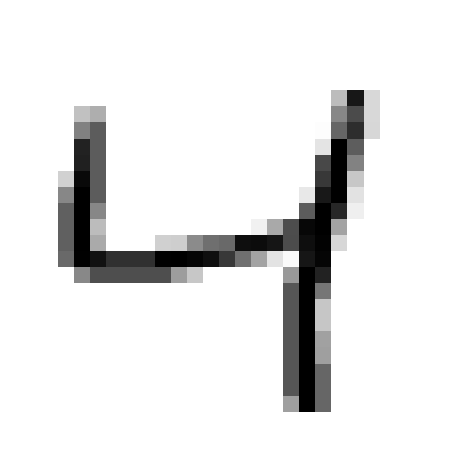

In [62]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [63]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [64]:
y = y.astype(np.uint8)

In [65]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [66]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [67]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


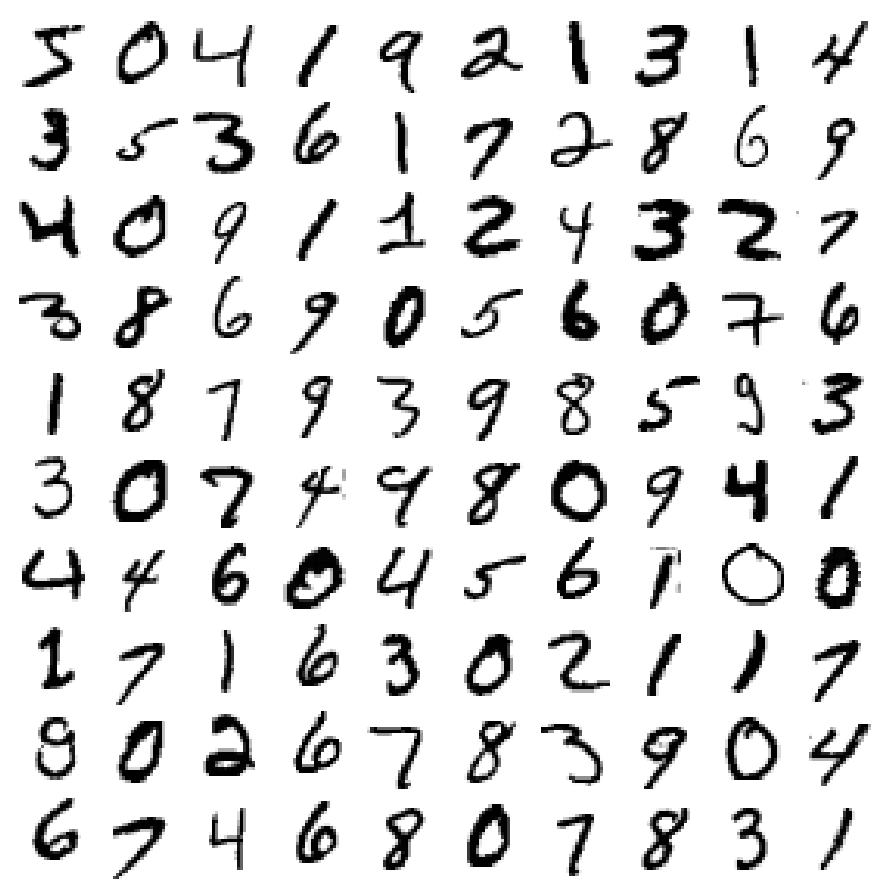

In [68]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [69]:
y[:100]

0     5
1     0
2     4
3     1
4     9
     ..
95    0
96    7
97    8
98    3
99    1
Name: class, Length: 100, dtype: uint8

In [70]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진분류기 (Binary classifier)

문제를 단순화해서 숫자 5만 식별해보자.

In [71]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [72]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

로지스틱 회귀 모델을 사용해보자.

In [73]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=500,random_state=0,verbose=1).fit(X_train, y_train_5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15888D+04    |proj g|=  3.63431D+06


 This problem is unconstrained.



At iterate   50    f=  4.94928D+03    |proj g|=  1.26195D+04

At iterate  100    f=  4.74459D+03    |proj g|=  2.92760D+03

At iterate  150    f=  4.68963D+03    |proj g|=  5.07134D+03

At iterate  200    f=  4.66260D+03    |proj g|=  2.53411D+03

At iterate  250    f=  4.64163D+03    |proj g|=  2.20140D+03

At iterate  300    f=  4.62650D+03    |proj g|=  1.41249D+03

At iterate  350    f=  4.61440D+03    |proj g|=  8.79322D+02

At iterate  400    f=  4.60325D+03    |proj g|=  9.19641D+02

At iterate  450    f=  4.59551D+03    |proj g|=  6.30640D+02

At iterate  500    f=  4.58942D+03    |proj g|=  1.22110D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
log_clf.predict([X[0],X[1],X[2]])

array([ True, False, False])

교차 검증을 사용해서 평가해보자.

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train_5, cv=5, scoring="accuracy")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32711D+04    |proj g|=  2.89550D+06


 This problem is unconstrained.



At iterate   50    f=  4.05850D+03    |proj g|=  1.01211D+04

At iterate  100    f=  3.91101D+03    |proj g|=  3.79538D+03

At iterate  150    f=  3.85911D+03    |proj g|=  1.74722D+03

At iterate  200    f=  3.83273D+03    |proj g|=  1.16885D+03

At iterate  250    f=  3.81251D+03    |proj g|=  1.21949D+03

At iterate  300    f=  3.79646D+03    |proj g|=  1.03318D+03

At iterate  350    f=  3.78724D+03    |proj g|=  6.64384D+02

At iterate  400    f=  3.78179D+03    |proj g|=  1.03825D+03

At iterate  450    f=  3.77789D+03    |proj g|=  5.98990D+02


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  500    f=  3.77349D+03    |proj g|=  8.77614D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    568      1     0     0   8.776D+02   3.773D+03
  F =   3773.4865041754074     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32711D+04    |proj g|=  2.89459D+06

At iterate   50    f=  3.87119D+03    |proj g|=  1.16589D+04

At iterate  100    f=  3.72277D+03    |proj g|=  2.28654D+03

At iter

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  500    f=  3.60412D+03    |proj g|=  7.31646D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    576      1     0     0   7.316D+02   3.604D+03
  F =   3604.1208379239361     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32711D+04    |proj g|=  2.91402D+06

At iterate   50    f=  3.93243D+03    |proj g|=  1.09601D+04

At iterate  100    f=  3.78209D+03    |proj g|=  5.50827D+03

At iter

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  500    f=  3.63877D+03    |proj g|=  4.62232D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    556      1     0     0   4.622D+02   3.639D+03
  F =   3638.7699800327082     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32711D+04    |proj g|=  2.90842D+06

At iterate   50    f=  3.72127D+03    |proj g|=  1.54908D+04

At iterate  100    f=  3.55869D+03    |proj g|=  2.68357D+03

At iter

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



At iterate  500    f=  3.40229D+03    |proj g|=  5.21910D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    561      1     0     0   5.219D+02   3.402D+03
  F =   3402.2944814576413     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32711D+04    |proj g|=  2.92472D+06


 This problem is unconstrained.



At iterate   50    f=  3.86667D+03    |proj g|=  6.48017D+03

At iterate  100    f=  3.72548D+03    |proj g|=  1.87575D+03

At iterate  150    f=  3.68576D+03    |proj g|=  1.50632D+03

At iterate  200    f=  3.66542D+03    |proj g|=  1.18536D+03

At iterate  250    f=  3.65197D+03    |proj g|=  9.84271D+02

At iterate  300    f=  3.64355D+03    |proj g|=  8.87980D+02

At iterate  350    f=  3.63470D+03    |proj g|=  1.69978D+03

At iterate  400    f=  3.62621D+03    |proj g|=  9.50020D+02

At iterate  450    f=  3.62083D+03    |proj g|=  6.18812D+02

At iterate  500    f=  3.61669D+03    |proj g|=  6.36417D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.97633333, 0.97425   , 0.97441667, 0.97208333, 0.97525   ])

모든 교차 검증 폴드에 대해 정확도가 97% 이상임. 모델이 좋아 보이는가?

In [76]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [77]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Never5Classifier() does not.

In [ ]:
never_5_clf.predict(X)

array([False, False, False, ..., False, False, False])

이미지의 10%만 숫자 5이기 때문에 무조건 5가 아닌 것으로 예측하면 정확도는 90%가 된다. 목표값(클래스)들이 불균형인 경우에 정확도(accuracy)는 좋은 지표가 아니다.

### 오차행렬 (Confusion matrix)

정확도를 대체할 matrix을 찾아보자!

In [78]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_clf, X_train, y_train_5, cv=3)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+04    |proj g|=  2.40669D+06


 This problem is unconstrained.



At iterate   50    f=  3.34786D+03    |proj g|=  3.62121D+03

At iterate  100    f=  3.20597D+03    |proj g|=  1.68618D+03

At iterate  150    f=  3.17760D+03    |proj g|=  1.46464D+03

At iterate  200    f=  3.16157D+03    |proj g|=  2.30792D+03

At iterate  250    f=  3.14975D+03    |proj g|=  1.18604D+03

At iterate  300    f=  3.13983D+03    |proj g|=  7.46401D+02

At iterate  350    f=  3.13378D+03    |proj g|=  8.00375D+02

At iterate  400    f=  3.12769D+03    |proj g|=  4.38214D+02

At iterate  450    f=  3.12236D+03    |proj g|=  1.27889D+03


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



At iterate  500    f=  3.11821D+03    |proj g|=  5.97522D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    575      1     0     0   5.975D+02   3.118D+03
  F =   3118.2094726716173     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+04    |proj g|=  2.41407D+06

At iterate   50    f=  3.12260D+03    |proj g|=  3.08119D+03

At iterate  100    f=  3.00080D+03    |proj g|=  2.51645D+03

At iterate  150    f=  2.95277D+03    |proj g|=  2.11482D+03

At iterate  200    f=  2.92729D+03    |proj g|=  1.56219D+03

At iterate  250    f=  2.90827D+03    |proj g|=  1.33824D+03

At iterate  300    f=  2.89093D+03    |proj g|=  1.60102D+03

At iterate  350    f=  2.87607D+03    |proj g|=  8.50466D+02

At iterate  400    f=  2.86855D+03    |proj g|=  7.63125D+02

At iterate  450    f=  2.86217D+03    |proj g|=  1.03663D+03


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  500    f=  2.85790D+03    |proj g|=  3.90296D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    568      1     0     0   3.903D+02   2.858D+03
  F =   2857.8959315831594     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+04    |proj g|=  2.44786D+06

At iterate   50    f=  3.10847D+03    |proj g|=  7.98432D+03

At iterate  100    f=  2.96979D+03    |proj g|=  3.13092D+03

At iter

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y_train_pred.shape

(60000,)

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53975,   604],
       [ 1029,  4392]])

<div>
<img src="images/fig3-2.png" width="600"/>
</div>

### precision = $\frac{TP}{TP+FP}$ (정밀도)

### recall = $\frac{TP}{TP+FN}$ (재현율)

In [81]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8791032826261009

In [82]:
4395/(4395+541)

0.8903970826580226

In [ ]:
recall_score(y_train_5, y_train_pred)

0.8101826231322634

In [84]:
4392/(4392+1029)

0.8101826231322634

In [85]:
confusion_matrix(y_train_5, never_5_clf.predict(X)[:60000])

array([[54579,     0],
       [ 5421,     0]])

In [86]:
precision_score(y_train_5, never_5_clf.predict(X)[:60000])

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [87]:
recall_score(y_train_5, never_5_clf.predict(X)[:60000])

0.0

##  Error cases 조사하기

In [88]:
errors = (y_train_pred != y_train_5)

In [89]:
errors

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

Saving figure more_digits_plot


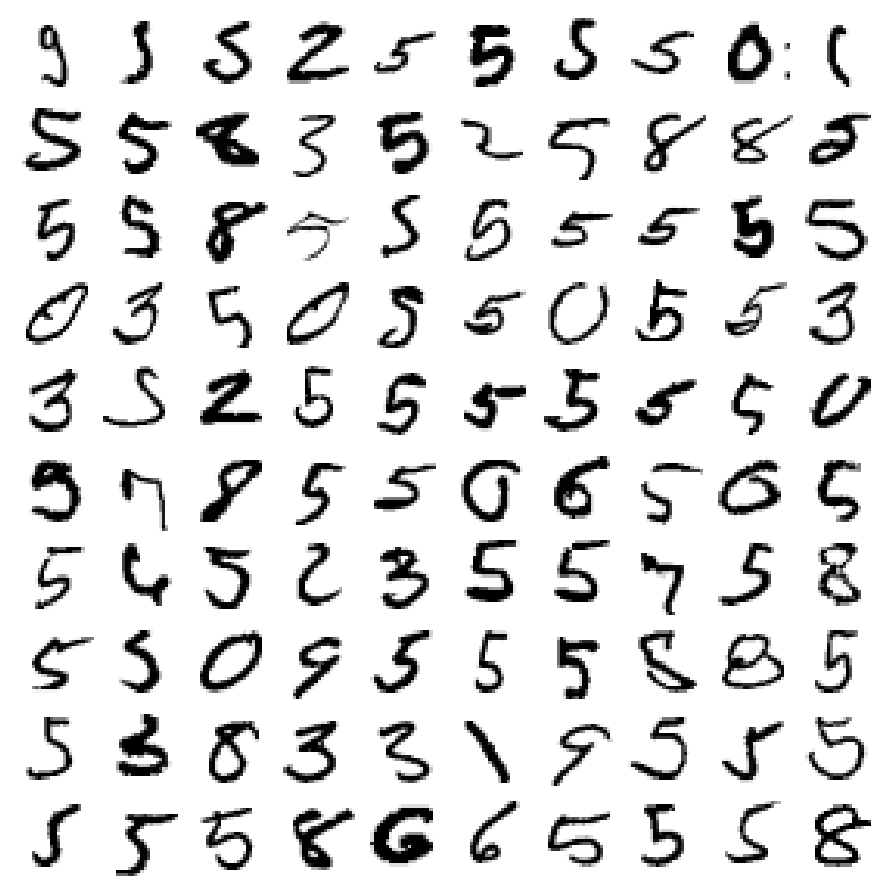

In [90]:
plt.figure(figsize=(9,9))
plot_digits(X_train[errors][:100], images_per_row=10)

save_fig("more_digits_plot")
plt.show()

## Precision/Recall 튜닝 : Trade-off

$ $

<div>
<img src="images/fig3-3.png" width="700"/>
</div>

- 진단프로그램 

FN (Negative로 분류했는데, True인 경우 : False)를 낮춰야 함. : Recall이 높아야 함.


> precision < recall

- 스팸 분류 

마찬기지로 recall 지표가 중요함.

- 선정성 동영상 분류 

FP (Positive로 분류했는데, False인 경우 : Negative)가 낮아야 함. : precision 지표가 더 중요함.

> precision > recall


In [98]:
for i in range(len(errors)):
    if errors[i]:
        print('train : ',y_train_5[i],'| predict :', y_train_pred[i])

train :  False | predict : True
train :  True | predict : False
train :  True | predict : False
train :  False | predict : True
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  False | predict : True
train :  False | predict : True
train :  True | predict : False
train :  True | predict : False
train :  False | predict : True
train :  False | predict : True
train :  True | predict : False
train :  False | predict : True
train :  True | predict : False
train :  False | predict : True
train :  False | predict : True
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  False | predict : True
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  True | predict : False
train :  False | predict : True
train : 

In [127]:
y_train_pred[48], y_train_5[48]

(True, False)

In [129]:
some_digit = X_train[48]
print(y_train[48])
# 예
y_scores = log_clf.decision_function([some_digit])
y_scores

9


array([0.44734775])

Saving figure some_digit_plot


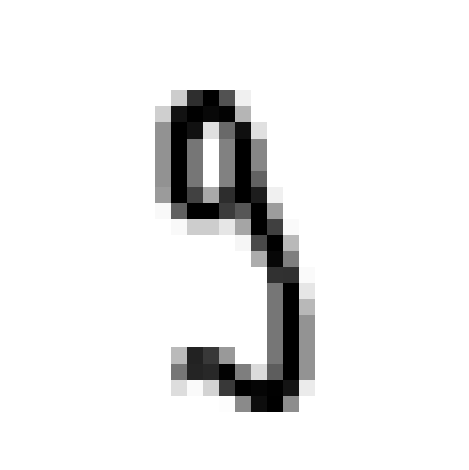

In [121]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [122]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [125]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [126]:
#
y_scores = cross_val_predict(log_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+04    |proj g|=  2.40669D+06


 This problem is unconstrained.



At iterate   50    f=  3.34786D+03    |proj g|=  3.62121D+03

At iterate  100    f=  3.20597D+03    |proj g|=  1.68618D+03

At iterate  150    f=  3.17760D+03    |proj g|=  1.46464D+03

At iterate  200    f=  3.16157D+03    |proj g|=  2.30792D+03

At iterate  250    f=  3.14975D+03    |proj g|=  1.18604D+03

At iterate  300    f=  3.13983D+03    |proj g|=  7.46401D+02

At iterate  350    f=  3.13378D+03    |proj g|=  8.00375D+02

At iterate  400    f=  3.12769D+03    |proj g|=  4.38214D+02

At iterate  450    f=  3.12236D+03    |proj g|=  1.27889D+03


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  500    f=  3.11821D+03    |proj g|=  5.97522D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  785    500    575      1     0     0   5.975D+02   3.118D+03
  F =   3118.2094726716173     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          785     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+04    |proj g|=  2.41407D+06

At iterate   50    f=  3.12260D+03    |proj g|=  3.08119D+03

At iterate  100    f=  3.00080D+03    |proj g|=  2.51645D+03

At iter

KeyboardInterrupt: 

In [113]:
y_scores

array([  1.51359098,  -8.82283002, -15.60727776, ...,   4.3789672 ,
        -3.65455158,  -6.32422059])

In [114]:
y_scores.shape

(60000,)

In [115]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [116]:
precisions.shape

(60001,)

In [117]:
thresholds.shape

(60000,)

Saving figure precision_vs_recall_plot


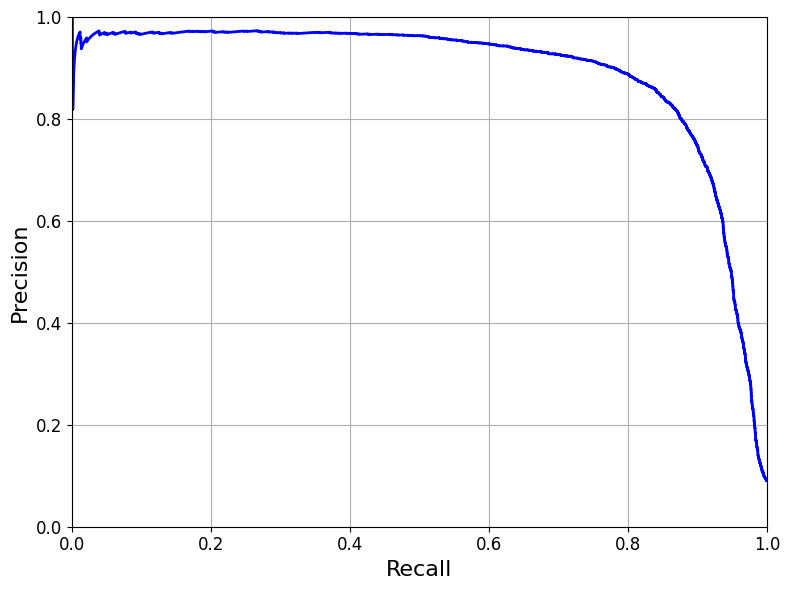

In [118]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

## 다중 분류 (Multiclass Classification)

In [131]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, verbose=1)
softmax_reg.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38155D+05    |proj g|=  9.75095D+05


 This problem is unconstrained.



At iterate   50    f=  1.60263D+04    |proj g|=  1.56806D+04



/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', verbose=1)

At iterate  100    f=  1.46877D+04    |proj g|=  8.21740D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7850    100    111      1     0     0   8.217D+03   1.469D+04
  F =   14687.749356368362     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [132]:
softmax_reg.predict(X_train)[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [133]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9243

## Data Augmentation

In [134]:
from scipy.ndimage.interpolation import shift

In [135]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

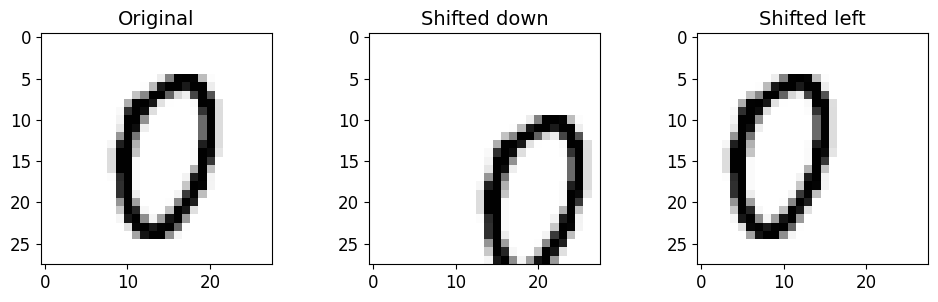

In [139]:
image = X_train[1000]
shifted_image_down = shift_image(image, 5, 5)
shifted_image_left = shift_image(image, -5, 0) 

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [140]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [141]:
X_train_augmented.shape

(300000, 784)

In [142]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [143]:
X_train_augmented.shape, X_train.shape

((300000, 784), (60000, 784))

In [147]:
softmax_reg_augmented = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=200, C=10, verbose=1)
softmax_reg_augmented.fit(X_train_augmented, y_train_augmented)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90776D+05    |proj g|=  4.02454D+06


 This problem is unconstrained.



At iterate   50    f=  1.19339D+05    |proj g|=  1.33424D+05

At iterate  100    f=  1.14664D+05    |proj g|=  4.11699D+04

At iterate  150    f=  1.13029D+05    |proj g|=  3.04232D+04

At iterate  200    f=  1.12315D+05    |proj g|=  1.46804D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7850    200    216      1     0     0   1.468D+04   1.123D+05
  F =   112315.24125751444     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=200, multi_class='multinomial', verbose=1)

In [149]:
y_pred = softmax_reg_augmented.predict(X_test)
accuracy_score(y_test, y_pred)

0.9279

Linear 모델은 데이터가 조금만 변형되면 인식하지 못하는 단점이 존재한다. -> CNN


## Titanic 데이터셋

In [150]:
import numpy as np
import pandas as pd

In [152]:
train_data = pd.read_csv("titanic.csv")

In [153]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


속성들

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, Embarked 속성들이 missing value를 가지고 있다.

Cabin, Name, Ticket 속성들은 무시한다.

In [155]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


오직 40% 미만이 생존했음을 알 수 있다.

In [156]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Categorical 속성들을 조사해보자.

In [157]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [158]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [159]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [160]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Numerical 속성을 처리하는 pipeline을 만든다.

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")), # missing value에 대해 중간값으로 대체
    ])

In [176]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [174]:
num_pipeline.fit_transform(train_data)[0]

array([22.  ,  1.  ,  0.  ,  7.25])

In [178]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [165]:
from sklearn.preprocessing import OneHotEncoder

In [171]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [179]:
# 각 attribute 중 가장 높은 class를 1로 지정
cat_pipeline.fit_transform(train_data)

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [180]:
cat_pipeline.fit_transform(train_data)[0]

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0., 0., 1., 0., 1., 0., 0., 1.])

Categorical, numerical 속성들을 통합한다.

In [181]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [183]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [185]:
X_train.shape

(891, 12)

목표값 벡터

In [186]:
y_train = train_data["Survived"]

In [187]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [188]:
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
a = np.c_[log_clf.decision_function(X_train), y_train, X_train]


In [190]:
df = pd.DataFrame(data=a, columns=["Score", "Survived", "Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3", "Female", "Male", "Embarked_C", "Embarked_Q", "Embarked_S"])

In [191]:
df

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,-2.334813,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.344457,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.479402,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.994339,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-2.493199,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1.018022,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,2.827853,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,-0.045007,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,0.334840,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [194]:
df.sort_values(by=['Score'], ascending=False)[:20]

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
258,4.061167,1.0,35.0,0.0,0.0,512.3292,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
700,3.534336,1.0,18.0,1.0,0.0,227.5250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
689,3.414679,1.0,15.0,0.0,1.0,211.3375,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
329,3.335684,1.0,16.0,0.0,1.0,57.9792,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
297,3.309651,0.0,2.0,1.0,2.0,151.5500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
307,3.223568,1.0,17.0,1.0,0.0,108.9000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
310,3.207159,1.0,24.0,0.0,0.0,83.1583,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
369,3.166576,1.0,24.0,0.0,0.0,69.3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
641,3.166576,1.0,24.0,0.0,0.0,69.3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
306,3.141882,1.0,28.0,0.0,0.0,110.8833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [193]:
df.sort_values(by=['Score'])[:20]

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
324,-4.760457,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
201,-4.760457,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
159,-4.760457,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
846,-4.760457,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
851,-3.922062,0.0,74.0,0.0,0.0,7.7750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
116,-3.458359,0.0,70.5,0.0,0.0,7.7500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
326,-3.450545,0.0,61.0,0.0,0.0,6.2375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
94,-3.374346,0.0,59.0,0.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
683,-3.368277,0.0,14.0,5.0,2.0,46.9000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
13,-3.340315,0.0,39.0,1.0,5.0,31.2750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
